# Mauricio Zárate Romero

# DataSet Synthetic Customer Data

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>1. Cargar el archivo CSV</b>
</div>

In [31]:
# Carga de librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from matplotlib.patches import Patch

In [32]:
# Carga de archivos de DataFrame

print("#############################################")
print("#       Synthetic Customer Data DATASET     #")
print("#############################################")

print("\n╔════════════════════════════════╗")  
print("║   ANÁLISIS DE CIENCIA DE DATOS ║")  
print("║       DESARROLLADO POR         ║")  
print("║    Mauricio Zárate Romero      ║")  
print("╚════════════════════════════════╝") 

# Synthetic_Customer_Data = df_scd

df_scd_copy = pd.read_csv('synthetic_customer_data.csv')

# Copia de seguridad para no modificar los DataFrames originales.

df_scd = df_scd_copy.copy()

#############################################
#       Synthetic Customer Data DATASET     #
#############################################

╔════════════════════════════════╗
║   ANÁLISIS DE CIENCIA DE DATOS ║
║       DESARROLLADO POR         ║
║    Mauricio Zárate Romero      ║
╚════════════════════════════════╝


In [33]:
df_scd.head(10)

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,1,1
1,2,34,Female,120.75,2,30,0,0
2,3,28,Male,315.00,6,5,1,1
3,4,45,Female,150.00,3,15,1,0
4,5,42,Male,175.50,4,25,0,0
5,6,33,Female,240.00,5,7,1,1
6,7,31,Male,305.00,7,9,1,1
7,8,40,Female,215.25,4,14,0,0
8,9,36,Male,185.50,3,20,1,0
9,10,29,Female,225.00,6,10,0,1


<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>2. Mostrar información básica del DataFrame</b>
</div>

In [34]:
# Información general/resumida sobre el DataFrame

print("\n╔══════════════════════════════════════════════════╗")
print("║         'synthetic_customer_data.csv'            ║")
print("║                  'Información'                   ║")
print("╚══════════════════════════════════════════════════╝")
print("\n" + "=" * 50)
df_scd.info()
print("\n" + "=" * 50)
print("\n- Total de filas duplicadas:", df_scd.duplicated().sum())
print("\n" + "=" * 50)
print('\n- Total de valores nulos:\n \n', df_scd.isna().sum())
print("\n" + "=" * 50)
print('\n- Estadísticas:\n \n', df_scd.describe())



╔══════════════════════════════════════════════════╗
║         'synthetic_customer_data.csv'            ║
║                  'Información'                   ║
╚══════════════════════════════════════════════════╝

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               100 non-null    int64  
 1   age                       100 non-null    int64  
 2   gender                    100 non-null    object 
 3   total_spent               100 non-null    float64
 4   frequency                 100 non-null    int64  
 5   days_since_last_purchase  100 non-null    int64  
 6   marketing_engaged         100 non-null    int64  
 7   returned_next_month       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


- Total de filas duplicadas: 0


- Total de valores nulos:
 
 custome

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>3.- Visualización de Datos</b>

</div>

<div style="background-color:rgb(9, 99, 184); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>Generar histogramas para analizar la distribución de age y total_spent.</b>


</div>

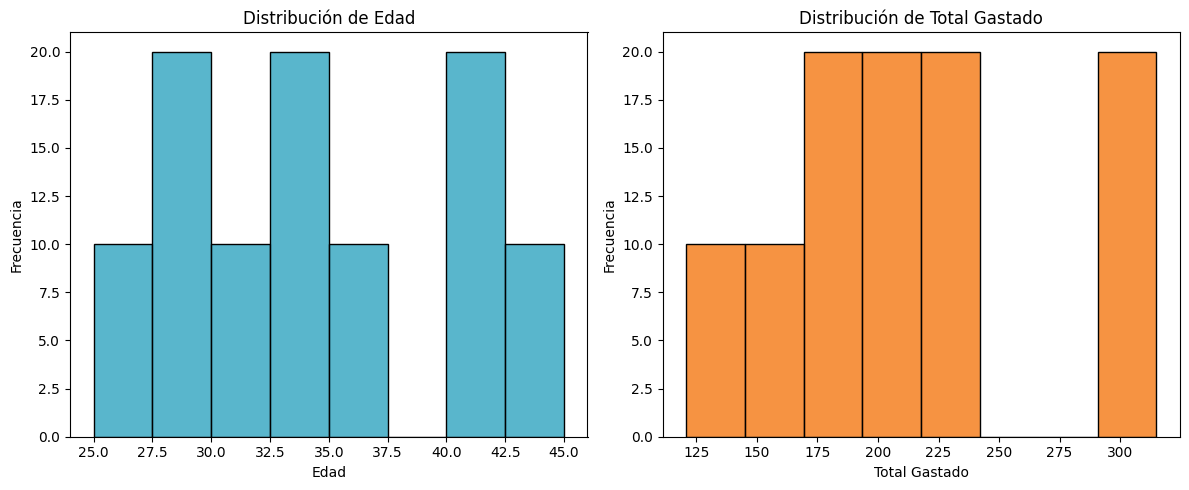

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df_scd['age'], ax=axes[0], color="#219ebc")
axes[0].set_title('Distribución de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df_scd['total_spent'], ax=axes[1], color="#f36f03")
axes[1].set_title('Distribución de Total Gastado')
axes[1].set_xlabel('Total Gastado')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<div style="background-color:rgb(9, 99, 184); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>Crear un gráfico de barras para observar la distribución de gender.</b>


</div>

gender
Male      50
Female    50
Name: count, dtype: int64


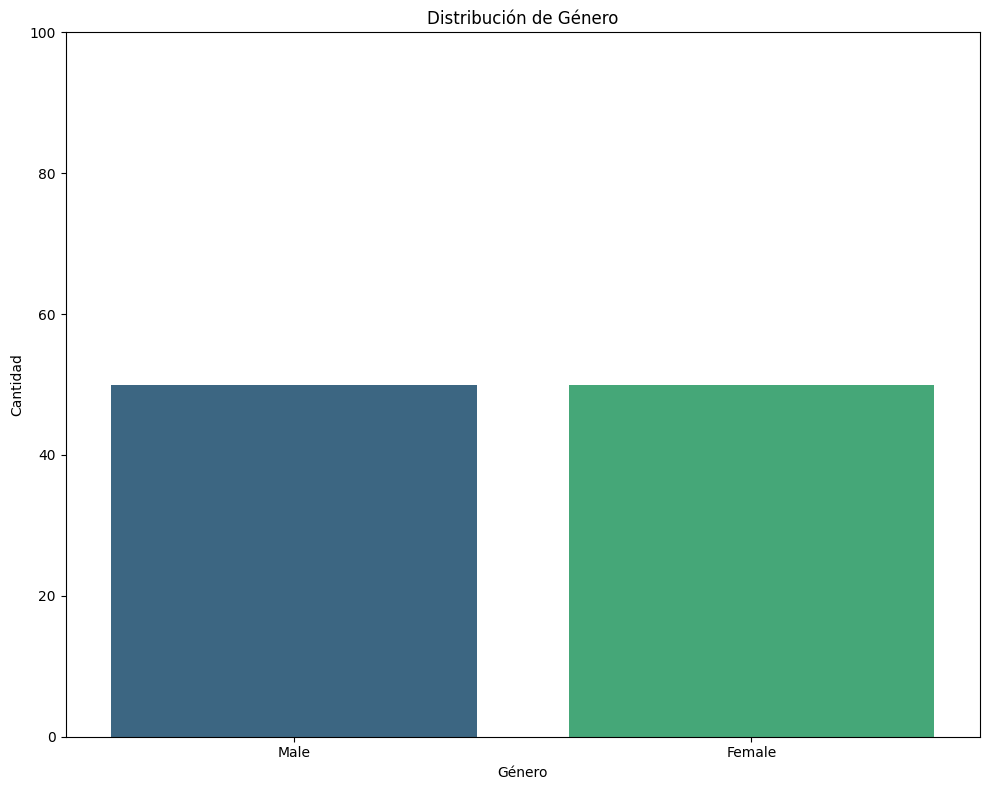

In [36]:
print(df_scd['gender'].value_counts())

#bar_gender = df_scd['gender'].value_counts()

# Es el mismo código, simplemente que este usa value_counts y el ultimo ya lo hace de manera predeterminada
# con sns.countplot 
'''plt.figure(figsize=(10,8))
sns.barplot(x = bar_gender.index,
            y = bar_gender.values,
            palette = 'viridis'
            )
plt.xlabel('Género')
plt.ylabel('y')
plt.title('Distribución de Género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()'''

plt.figure(figsize=(10, 8))
sns.countplot(data=df_scd, 
              x='gender', 
              hue='gender',
              palette='viridis')
plt.ylim(0, 100)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género')
plt.tight_layout()
plt.show()

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>4. Preprocesamiento de los Datos:</b>
</div>

<div style="background-color:rgb(9, 99, 184); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>Verificar si existen valores nulos en el conjunto de datos y documentar los resultados.</b>


</div>

In [37]:
print('\n- Total de valores nulos:\n \n', df_scd.isna().sum())


- Total de valores nulos:
 
 customer_id                 0
age                         0
gender                      0
total_spent                 0
frequency                   0
days_since_last_purchase    0
marketing_engaged           0
returned_next_month         0
dtype: int64


En este DataSet no existen valores nulos

<div style="background-color:rgb(9, 99, 184); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>Codificar la variable gender en valores numéricos (0 para Female, 1 para Male).</b>


</div>

In [38]:
mapping = {'Female': 0, 'Male': 1}
df_scd['gender_num'] = df_scd['gender'].map(mapping)

# Acomodo las columnas para que gender y gender_num estén contiguas.
cols = ['customer_id', 'age', 'gender', 'gender_num', 'total_spent', 
        'frequency', 'days_since_last_purchase', 'marketing_engaged', 
        'returned_next_month']
df_scd = df_scd[cols]

df_scd.head()
        

,customer_id,age,gender,gender_num,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,1,200.50,5,12,1,1
1,2,34,Female,0,120.75,2,30,0,0
2,3,28,Male,1,315.00,6,5,1,1
3,4,45,Female,0,150.00,3,15,1,0
4,5,42,Male,1,175.50,4,25,0,0


<div style="background-color:rgb(9, 99, 184); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>Escalar las columnas numéricas (age, total_spent, frequency, days_since_last_purchase) usando StandardScaler para asegurar consistencia en las escalas.</b>


</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Aún no he aprendido a usar sklearn, por lo que hasta aquí llega mi conocimiento en este proyecto.</b> <a class="tocSkip"></a><br>    
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>5. Dividir los Datos en Entrenamiento y Prueba:</b>
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>6. Entrenamiento de Modelos:</b>
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>7. Evaluación Inicial de Modelos:</b>
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>8. Optimización del Mejor Modelo:</b>
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>9. Validación y Análisis de Errores:</b>
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>10. Conclusión y Recomendaciones:</b>
</div>

<div style="background-color:rgb(42, 146, 175); padding: 10px; border-left: 5px solidrgb(34, 119, 148); border-radius: 3px;">
  <b>11. Considera los criterios de evaluación</b>
</div>